In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"ViratKohli.csv",encoding="latin-1")

In [6]:
df

,No.,Runs,Against,Format,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,ODI,4,2,Kolkata,Home,24-12-2009,Won
1,2,102*,Bangladesh,ODI,3,2,Dhaka,Away,11-01-2010,Won
2,3,118,Australia,ODI,3,2,Visakhapatnam,Home,20-10-2010,Won
3,4,105,New Zealand,ODI,3,1,Guwahati,Home,28-11-2010,Won
4,5,100*,Bangladesh,ODI,4,1,Dhaka,Away,19-02-2011,Won
...,...,...,...,...,...,...,...,...,...,...
76,77,122*,Pakistan,ODI,3,1,Colombo,Neutral,11-09-2023,Won
77,78,103*,Bangladesh,ODI,3,2,Pune,Home,19-10-2023,Won
78,79,101*,South Africa,ODI,3,1,Kolkata,Home,05-11-2023,Won
79,80,117,New Zealand,ODI,3,1,Mumbai,Home,15-11-2023,Won


In [7]:
df.shape

(81, 10)

In [8]:
df.columns

Index(['No.', 'Runs', 'Against', 'Format', 'Position', 'Innings', 'Venue',
       'Ground', 'Date', 'Result'],
      dtype='object')

In [9]:
df = df.drop(['No.','Runs','Date'],axis='columns')

In [10]:
df

,Against,Format,Position,Innings,Venue,Ground,Result
0,Sri Lanka,ODI,4,2,Kolkata,Home,Won
1,Bangladesh,ODI,3,2,Dhaka,Away,Won
2,Australia,ODI,3,2,Visakhapatnam,Home,Won
3,New Zealand,ODI,3,1,Guwahati,Home,Won
4,Bangladesh,ODI,4,1,Dhaka,Away,Won
...,...,...,...,...,...,...,...
76,Pakistan,ODI,3,1,Colombo,Neutral,Won
77,Bangladesh,ODI,3,2,Pune,Home,Won
78,South Africa,ODI,3,1,Kolkata,Home,Won
79,New Zealand,ODI,3,1,Mumbai,Home,Won


In [11]:
df.isnull()

,Against,Format,Position,Innings,Venue,Ground,Result
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
76,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False
78,False,False,False,False,False,False,False
79,False,False,False,False,False,False,False


In [12]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
76,False
77,False
78,False
79,False


In [13]:
v = {'Adelaide':1,'Ahmedabad':2,'Bangalore':3,'Birmingham':4,'Burswood':5,'Canberra':6,'Cape Town':7,'Cardiff':8,'Centurion':9,'Chennai':10,'Chittagong':11,'Colombo':12,'Delhi':13,'Dhaka':14,'Dharamshala':15,'Dubai':16,'Durban':17,'Fatullah':18,'Galle':19,'Guwahati':20,'Hambantota':21,'Harare':22,'Hobart':23,'Hyderabad':24,'Indore':25,'Jaipur':26,'Johannesburg':27,'Kanpur':28,'Kingston':29,'Kolkata':30,'Melbourne':31,'Mohali':32,'Mumbai':33,'Nagpur':34,'Napier':35,'North Sound':36,'Nottingham':37,'Perth':38,'Port of Spain':39,'Pune':40,'Rajkot':41,'Ranchi':42,'Sydney':43,'Thiruvananthapuram':44,'Visakhapatnam':45,'Wellington':46}
t = {' Australia':1,' New Zealand':2,' England':3,' South Africa':4,' Pakistan':5,' Sri Lanka':6,' Bangladesh':7,' West Indies':8,' Afghanistan':9,' Zimbabwe':10}
f = {'ODI':5,'T20':2,'Test':9}
g = {'Home':10,'Away':20,'Neutral':30}
r = {'Won':2,'Lost':0,'Drawn':1}
df.replace({'Against':t,'Format':f,'Ground':g,'Venue':v,'Result':r},inplace=True)

<ipython-input-13-0e3f198135bb>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Against':t,'Format':f,'Ground':g,'Venue':v,'Result':r},inplace=True)


In [14]:
df

,Against,Format,Position,Innings,Venue,Ground,Result
0,6,5,4,2,30,10,2
1,7,5,3,2,14,20,2
2,1,5,3,2,45,10,2
3,2,5,3,1,20,10,2
4,7,5,4,1,14,20,2
...,...,...,...,...,...,...,...
76,5,5,3,1,12,30,2
77,7,5,3,2,40,10,2
78,4,5,3,1,30,10,2
79,2,5,3,1,33,10,2


In [15]:
df.rename(columns={'Against':'Team'},inplace=True)

In [16]:
df.head(40)

,Team,Format,Position,Innings,Venue,Ground,Result
0,6,5,4,2,30,10,2
1,7,5,3,2,14,20,2
2,1,5,3,2,45,10,2
3,2,5,3,1,20,10,2
4,7,5,4,1,14,20,2
5,3,5,4,1,8,20,0
6,3,5,4,2,13,10,2
7,8,5,4,2,45,10,2
8,1,9,6,2,1,20,0
9,6,5,4,2,23,30,2


In [17]:
df.tail(40)

,Team,Format,Position,Innings,Venue,Ground,Result
41,3,5,3,2,40,10,2
42,7,9,4,1,24,10,2
43,8,5,3,2,29,20,2
44,6,9,4,3,19,20,2
45,6,5,3,1,12,20,2
46,6,5,3,2,12,20,2
47,2,5,3,1,33,10,0
48,2,5,3,1,28,10,2
49,6,9,4,3,30,10,1
50,6,9,4,2,34,10,2


In [18]:
features = ['Team','Format','Position','Innings','Venue','Ground']
np.random.seed(42)

In [19]:
X = df[features]
Y = df['Result']
dtree = DecisionTreeClassifier()
dtree.fit(X,Y)
dtree.score(X,Y)

0.9876543209876543

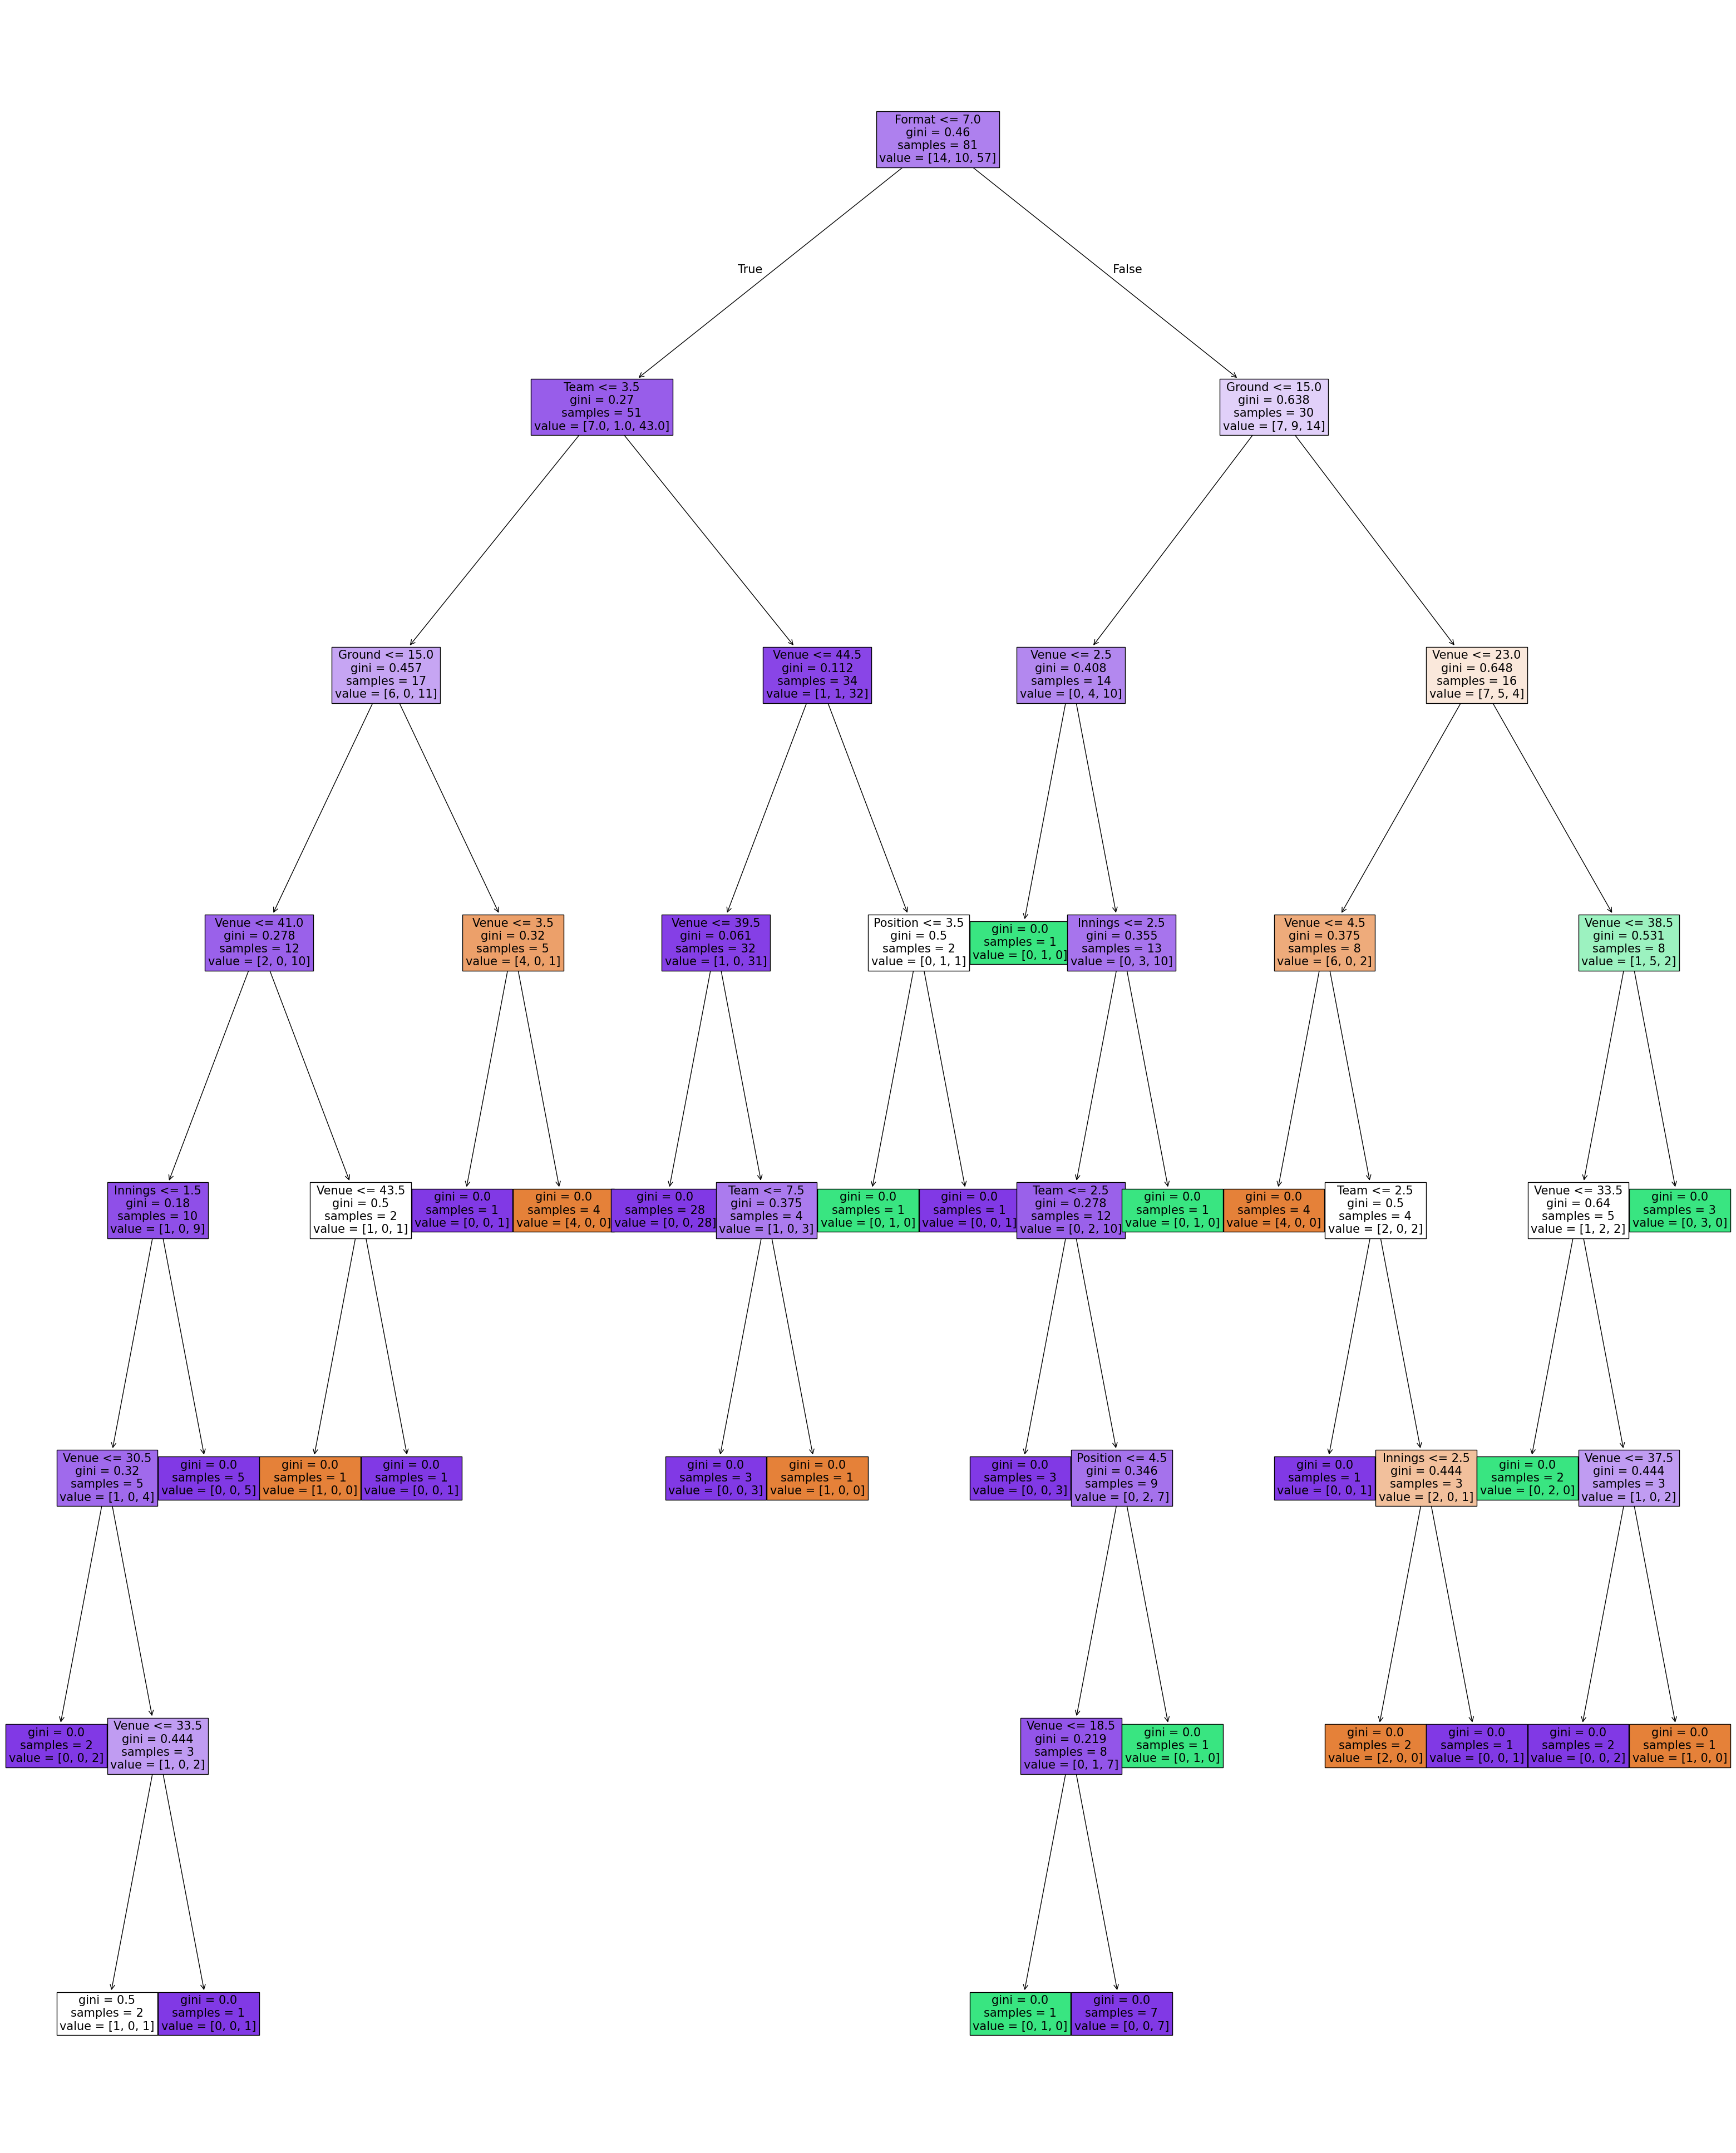

In [20]:
plt.figure(figsize=(40,50))
tree.plot_tree(dtree,feature_names=features,fontsize=15,filled=True,max_depth=500)
plt.show()

In [21]:
dtree.predict([[1,5,3,2,3,10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [22]:
dtree.predict([[5,5,3,2,2,10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])